

Loading the libraries




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive# Import necessary libraries
import pandas as pd


In [4]:
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Specify the file path
file_path = "/content/drive/MyDrive/NLP_LAB/archive(7)/train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data=pd.read_csv('/content/drive/MyDrive/NLP_LAB/archive (7)/train.csv')
data

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Data Preprocessing

In [6]:
data['Title'].isnull().sum()

0

In [7]:
data['Description'].isnull().sum()

0

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Data Cleaning


In [9]:
import re
import string

def clean_text(text ):
    text =''.join(word for word in text if word not in string.punctuation)
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    return text1

In [10]:
#Tokenization and Lemmatization

# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist

Applying Function

In [11]:
# Cleaning
data['Description'] = data['Description'].apply(lambda x: clean_text(x))
# Lemmatization
data['Description'] = data['Description'].apply(lambda x: lemmatize_text(x))

In [12]:
# Apply the functions on Description column

# Clean
data['Description'] = data['Description'].apply(lambda x: clean_text(x))
# Lemmatize
data['Description'] = data['Description'].apply(lambda x: lemmatize_text(x))

In [13]:
# Apply the functions on Title column

# Clean
data['Title'] = data['Title'].apply(lambda x: clean_text(x))
# Lemmatize
data['Title'] = data['Title'].apply(lambda x: lemmatize_text(x))

In [16]:
print(data)

        Class Index                                              Title  \
0                 3  [wall, st, bears, claw, back, into, the, black...   
1                 3  [carlyle, looks, toward, commercial, aerospace...   
2                 3  [oil, and, economy, cloud, stocks, outlook, re...   
3                 3  [iraq, halts, oil, exports, from, main, southe...   
4                 3  [oil, prices, soar, to, alltime, record, posin...   
...             ...                                                ...   
119995            1  [pakistans, musharraf, says, wont, quit, as, a...   
119996            2             [renteria, signing, a, topshelf, deal]   
119997            2             [saban, not, going, to, dolphins, yet]   
119998            2                               [todays, nfl, games]   
119999            2                 [nets, get, carter, from, raptors]   

                                              Description  
0       [reutersshortsellerswallstreetsdwindlingban

**Count Vectorization**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk

data['Title'] = data['Title'].apply(lambda x: ' '.join(map(str, x)))
data['Description'] = data['Description'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text'] = data['Title'] + ' ' + data['Description']

vectorizer = CountVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1, 3), max_df=0.75,
                             min_df=5, max_features=5000)

countMat = vectorizer.fit_transform(data['Combined_Text'])

feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['abandons' 'abbas' 'abbey' ... 'zone' 'zook' 'zurich']


In [18]:
print(countMat)

  (0, 4806)	1
  (0, 4163)	1
  (0, 357)	1
  (0, 421)	1
  (0, 3646)	1
  (0, 4807)	1
  (1, 3646)	1
  (1, 2500)	1
  (1, 865)	1
  (2, 3646)	1
  (2, 2991)	1
  (2, 1315)	1
  (2, 820)	1
  (2, 4223)	1
  (2, 3067)	1
  (3, 3646)	1
  (3, 2991)	1
  (3, 2179)	1
  (3, 1865)	1
  (3, 1446)	1
  (3, 2549)	1
  (3, 4100)	1
  (3, 3210)	1
  (3, 2993)	1
  (4, 2991)	1
  :	:
  (119993, 4609)	1
  (119993, 1044)	1
  (119993, 278)	1
  (119993, 4298)	1
  (119993, 4916)	1
  (119994, 3866)	1
  (119994, 1630)	1
  (119994, 2425)	1
  (119994, 4383)	1
  (119995, 751)	1
  (119995, 4929)	1
  (119995, 3800)	1
  (119995, 223)	1
  (119995, 2811)	1
  (119995, 3466)	1
  (119996, 1067)	1
  (119996, 4000)	1
  (119997, 1226)	1
  (119997, 1770)	1
  (119998, 1700)	1
  (119998, 2900)	1
  (119998, 4533)	1
  (119999, 2875)	1
  (119999, 653)	1
  (119999, 3501)	1


In [19]:
#Splitting the dataset train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(countMat,
                                                    data['Class Index'],
                                                    stratify=data['Class Index'],
                                                    random_state=1)

In [20]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(90000, 5000)
Test_Set_Size:(30000, 5000)


** LR count vectorization**


In [21]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=10,max_iter=5000)

best_model=logistic.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


In [22]:
algorithm=[]
precision=[]
recall=[]
accuracys=[]

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           1       0.89      0.83      0.86      7500
           2       0.83      0.92      0.87      7500
           3       0.83      0.81      0.82      7500
           4       0.84      0.81      0.82      7500

    accuracy                           0.84     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.84      0.84      0.84     30000



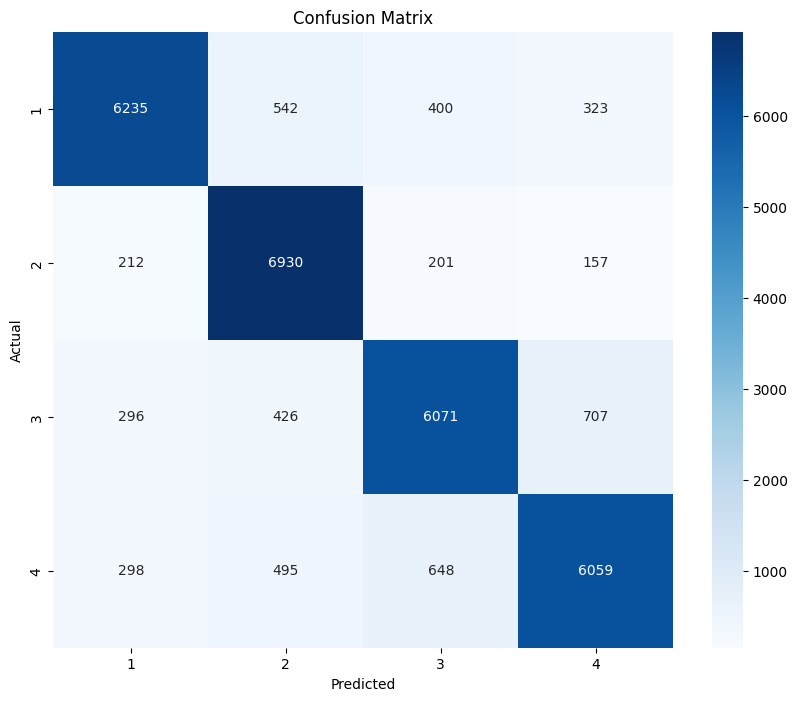

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

**SVM**(support vector machine)


In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.8384666666666667


In [29]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))

              precision    recall  f1-score   support

           1       0.90      0.83      0.86      7500
           2       0.81      0.93      0.87      7500
           3       0.84      0.79      0.81      7500
           4       0.82      0.81      0.81      7500

    accuracy                           0.84     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.84      0.84      0.84     30000



In [33]:
accuracys.append(accuracy_score(y_test,y_pred))

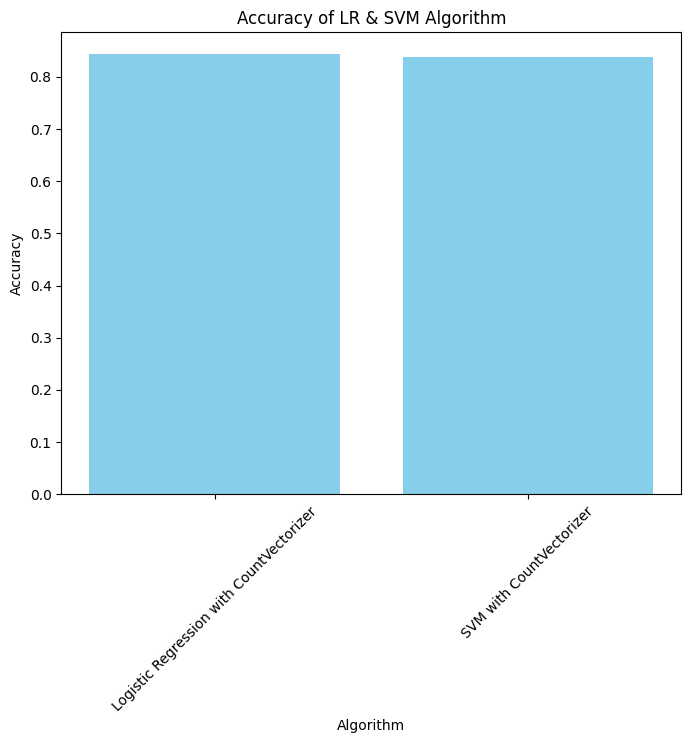

In [35]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(algorithm, accuracys, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of LR & SVM Algorithm')
plt.xticks(rotation=45)
plt.show()

Random Forest with Count Vectorizerization

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.7995333333333333


In [37]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.79      0.82      7500
           2       0.79      0.86      0.83      7500
           3       0.78      0.78      0.78      7500
           4       0.78      0.77      0.77      7500

    accuracy                           0.80     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.80      0.80      0.80     30000



**TFIDFVectorizer**

In [38]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
import re
import string

def clean_text(text ):
    text =''.join(word for word in text if word not in string.punctuation)
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    return text1
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist
# Apply the functions on Description column

# Clean
data['Description'] = data['Description'].apply(lambda x: clean_text(x))
# Lemmatize
data['Description'] = data['Description'].apply(lambda x: lemmatize_text(x))
# Apply the functions on Title column

# Clean
data['Title'] = data['Title'].apply(lambda x: clean_text(x))
# Lemmatize
data['Title'] = data['Title'].apply(lambda x: lemmatize_text(x))

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk

# Assuming data is your DataFrame with 'Title' and 'Description' columns
# Concatenate 'Title' and 'Description' into a new column 'Combined_Text'
# Convert list elements to strings in 'Title' and 'Description' columns
data['Title'] = data['Title'].apply(lambda x: ' '.join(map(str, x)))
data['Description'] = data['Description'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text1'] = data['Title'] + ' ' + data['Description']

# Text to TFIDF values
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1,3), max_df=0.75,
                             min_df=5, use_idf=True,
                             smooth_idf=True, max_features=3000)

# Fit and transform on the combined text
tfIdfMat = vectorizer.fit_transform(data['Combined_Text1'])

# Feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['abandons' 'abbas' 'abbey' ... 'zone' 'zook' 'zurich']


In [42]:
# Feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['abandons' 'abbas' 'abbey' ... 'zone' 'zook' 'zurich']


In [43]:
print(tfIdfMat)

  (0, 4807)	0.4977843367284801
  (0, 3646)	0.25307261193451874
  (0, 421)	0.4164910865525103
  (0, 357)	0.4443523682413058
  (0, 4163)	0.38089923813675175
  (0, 4806)	0.41493002451488353
  (1, 865)	0.7216005416684927
  (1, 2500)	0.5919978655473597
  (1, 3646)	0.35893061370006873
  (2, 3067)	0.435458199540921
  (2, 4223)	0.3476319901639904
  (2, 820)	0.5724098141017779
  (2, 1315)	0.4309456352880296
  (2, 2991)	0.3137597952684008
  (2, 3646)	0.2787755564724038
  (3, 2993)	0.40996321176529527
  (3, 3210)	0.3719630043536348
  (3, 4100)	0.34138810960026794
  (3, 2549)	0.40996321176529527
  (3, 1446)	0.36101573909171125
  (3, 1865)	0.38322641051993966
  (3, 2179)	0.2206697123863047
  (3, 2991)	0.2154563896092413
  (3, 3646)	0.19143298731907485
  (4, 3000)	0.3672189739276579
  :	:
  (119993, 278)	0.4527492197820186
  (119993, 1044)	0.33131726741841333
  (119993, 4609)	0.4263581936732361
  (119993, 3800)	0.25375107924548584
  (119993, 367)	0.3700068678477993
  (119994, 4383)	0.543940905788456

In [44]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat,
                                                    data['Class Index'],
                                                    stratify=data['Class Index'],
                                                    random_state=1)

In [45]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
print('Train_Set_Size:'+str(y_train.shape))
print('Test_Set_Size:'+str(y_test.shape))

Train_Set_Size:(90000, 5000)
Test_Set_Size:(30000, 5000)
Train_Set_Size:(90000,)
Test_Set_Size:(30000,)


In [46]:
#Logistic Regression with TFIDF

# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [47]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.84      0.86      7500
           2       0.83      0.92      0.87      7500
           3       0.83      0.82      0.83      7500
           4       0.84      0.81      0.82      7500

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000

              precision    recall  f1-score   support

           1       0.88      0.84      0.86      7500
           2       0.83      0.92      0.87      7500
           3       0.83      0.82      0.83      7500
           4       0.84      0.81      0.82      7500

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000



In [48]:
#SVM Classifier with TFIDF

from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.6072


In [ ]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Support Vector Machine with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

In [49]:
#Random Forest Classifier with TFIDF

from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.8123
              precision    recall  f1-score   support

           1       0.86      0.81      0.83      7500
           2       0.79      0.88      0.83      7500
           3       0.80      0.78      0.79      7500
           4       0.80      0.78      0.79      7500

    accuracy                           0.81     30000
   macro avg       0.81      0.81      0.81     30000
weighted avg       0.81      0.81      0.81     30000



In [50]:
#(Navie Bayes) with TFIDF
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Performance measures
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
algorithm.append("MultinomialNB with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[6359  404  408  329]
 [ 488 6569  212  231]
 [ 486  276 5959  779]
 [ 500  316  674 6010]]
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.85      0.83      7500
           2       0.87      0.88      0.87      7500
           3       0.82      0.79      0.81      7500
           4       0.82      0.80      0.81      7500

    accuracy                           0.83     30000
   macro avg       0.83      0.83      0.83     30000
weighted avg       0.83      0.83      0.83     30000



**GoogleNews Word2Vec**

In [51]:
import gensim
import numpy as np

In [53]:
model=gensim.models.keyedvectors.load_word2vec_format("/content/drive/MyDrive/NLP_LAB/GoogleNews-vectors-negative300.bin",binary=True)

In [54]:
vocab = model.key_to_index

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
def embeddings(text):
  DIM = 300
  zero_vec = np.zeros(DIM)
  features = []
  for tokens in text:
    feat = np.zeros(DIM)
    count = 0 + 1e-5 #for DIV by 0 error
    for token in tokens:
      if token in model:
        feat += model[token]
        count += 1
    if(count !=0):
      features.append(feat/count)
    else:
      features.append(zero_vec)
  return features

In [57]:
data['Title'] = data['Title'].apply(lambda x: ' '.join(map(str, x)))
data['Description'] = data['Description'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text2'] = data['Title'] + ' ' + data['Description']
data_vec=embeddings(data['Combined_Text2'])

In [58]:
print(len(data_vec))

120000


In [59]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(data_vec,
                                                    data['Class Index'],
                                                    stratify=data['Class Index'],
                                                    random_state=1)

**Logistic Regression using Word2vec**

In [60]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))


              precision    recall  f1-score   support

           1       0.48      0.48      0.48      7500
           2       0.50      0.54      0.52      7500
           3       0.45      0.39      0.42      7500
           4       0.48      0.50      0.49      7500

    accuracy                           0.48     30000
   macro avg       0.48      0.48      0.48     30000
weighted avg       0.48      0.48      0.48     30000

              precision    recall  f1-score   support

           1       0.48      0.48      0.48      7500
           2       0.50      0.54      0.52      7500
           3       0.45      0.39      0.42      7500
           4       0.48      0.50      0.49      7500

    accuracy                           0.48     30000
   macro avg       0.48      0.48      0.48     30000
weighted avg       0.48      0.48      0.48     30000



In [61]:
accuracys.append(accuracy_score(y_test,y_pred))

SVM using Word2vec

In [62]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with Word2Vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000)

Random Forest using Word2vec

In [63]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.5033
              precision    recall  f1-score   support

           1       0.51      0.50      0.51      7500
           2       0.51      0.57      0.54      7500
           3       0.49      0.43      0.46      7500
           4       0.50      0.51      0.51      7500

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [64]:
df = pd.DataFrame({'algorithm':algorithm,'Precision': precision,'Recall': recall,'Accuracy': accuracys})

In [65]:
df

,algorithm,Precision,Recall,Accuracy
0,Logistic Regression with CountVectorizer,0.844193,0.843167,0.843167
1,SVM with CountVectorizer,0.840513,0.838467,0.838467
2,Random Forest with CountVectorizer,0.800774,0.799533,0.799533
3,Logistic Regression with TFIDF,0.847189,0.846367,0.846367
4,Random Forest with TFIDF,0.813236,0.812300,0.812300
5,MultinomialNB with TFIDF,0.829888,0.829900,0.829900
6,Logistic Regression with Word2vec,0.478945,0.480267,0.480267
7,Random Forest with Word2vec,0.502845,0.503300,0.503300
